In [1]:
import numpy as np
import pandas as pd
import tweepy
import sqlite3
from tweepy import Stream
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import API
import matplotlib.pyplot as plt
import time
import pickle
import joblib

In [2]:
#!pip install sqlite3
access_token='277096430-VaZfIqjPFJ3cbRxNlWgnD7IBMSklCY8UEmWqMeHZ'
access_token_secret='dTUgaMwTC7me96slf0aIr6DtKmknHDcgHlTrU7coa4rkx'
consumer_key='QmGhW53Sn8Ss7vsegJkDgEVMP'
consumer_secret='xeaYI1i9vJUAsBJcZ8luNZQHBllCTQ46nXATTymMJu36cN4RH5'

In [3]:
def createdatabase():
    try:
        conn=sqlite3.connect("Twitter_store.db")
        print("Database connection successfull")
        conn.execute('''CREATE TABLE search_twitter_data
                (Date TEXT,
                Text TEXT,
                UserName TEXT,
                ScreenName TEXT,
                Bio TEXT,
                FollowersCount INT,
                FollowingCount INT,
                Language TEXT,
                RetweetCount INT,
                Location TEXT,
                Id_str TEXT,
                Source TEXT,
                Link TEXT);''')
        print('Table created successfully')
        conn.close()
    except:
        print('table already exists')
    
    return()
    

In [4]:
createdatabase()
conn=sqlite3.connect("Twitter_store.db")
auth=OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

#wait_on_rate_limit whether or not to automatically wait for rate limit to replenish
#wait_on_rate_limit_notify whether or not to print a notification when Tweepy is waiting for rate limi to replenish
#Sleep mode is automatically enabled with these two params

Database connection successfull
Table created successfully


In [5]:
tweetsPerQuery=100 #default
maxTweets=1000 #for while loop

#No sinceId and maxId 
sinceId=None
maxId=-1
tweet_count=0

print('Downloading tweets...takes some time')

searchquery='samsung'
searchquery1="(samsung phone) OR (samsung smartphone) OR (samsung mobile)\
OR (samsung galaxy) OR (samsung series) OR (samsung note)\
"

#Knowledge
#AND is the default e.g query="big data" is "big" and "data" in the tweet.
#OR is OR operator e.g.query="like" OR "love"
#Negation is done using "-" symbol e.g query="apple-phone"


In [6]:
data=[]
while (tweet_count<maxTweets):
    conn=sqlite3.connect("Twitter_store.db")
    try:
        if(maxId<=0):
            if(not sinceId):
                new_tweets=api.search(q=searchquery1+"-filter:retweets",count=tweetsPerQuery,lang="en",tweet_mode="extended")
            else:
                new_tweets=api.search(q=searchquery1+"-filter:retweets",count=tweetsPerQuery,lang="en",tweet_mode="extended",sinceId=sinceId)
        else:
            if(not sinceId):
                new_tweets=api.search(q=searchquery1+"-filter:retweets",count=tweetsPerQuery,lang="en",tweet_mode="extended",maxId=str(maxId-1))
            else:
                new_tweets=api.search(q=searchquery1+"-filter:retweets",count=tweetsPerQuery,lang="en",tweet_mode="extended",maxId=str(maxId-1),sinceId=sinceId)
        
        #No Tweets 
        if(not new_tweets):
            break
        
        for tweet in new_tweets:
            date=tweet.created_at
            text=tweet.full_text            
            username=tweet.user.name            
            screenname=tweet.user.screen_name            
            bio=tweet.user.description           
            followerscount=tweet.user.followers_count
            followingcount=tweet.user.friends_count           
            language=tweet.lang
            retweetcount=tweet.retweet_count
            location=tweet.user.location            
            id_str=tweet.id_str            
            source=tweet.source            
            #print(username)
            link='https://twitter.com/'+str(''.join(screenname))+'/status/'+str(''.join(id_str))
            
            conn.execute("INSERT INTO search_twitter_data VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)",(date,text,username,screenname,bio,followerscount,followingcount,language,retweetcount,location,id_str,source,link))
            conn.commit()
            #Additional info f.write(jsonpickle.encode(tweet._json,unpicklable=False)+'\n')
            #(Date,Text,UserName,ScreenName,Bio,FollowersCount,FollowingCount,Language,RetweetCount,Location,Id_str,Source,Link)
            #(str(date),str(text),str(username),str(screenname),str(bio),int(followerscount),int(followingcount),str(language),int(retweetcount),str(location),str(id_str),str(source),str(link))
        tweet_count+=len(new_tweets)
        maxId=new_tweets[-1].id
        if tweet_count % 80000==0:
            print(tweet_count)        
        
    except tweepy.TweepError as e:
        print("Some error!!:"+str(e))
        continue
conn.close()

print("Successfully Completed")
        

Successfully Completed


In [7]:
import sqlite3
import pandas as pd

In [8]:
conn=sqlite3.connect("Twitter_store.db")
conn.cursor()
df=pd.read_sql_query("SELECT * from search_twitter_data",conn)
conn.close()

In [9]:
df.count()

Date              1000
Text              1000
UserName          1000
ScreenName        1000
Bio               1000
FollowersCount    1000
FollowingCount    1000
Language          1000
RetweetCount      1000
Location          1000
Id_str            1000
Source            1000
Link              1000
dtype: int64

In [10]:
df.head(20)

,Date,Text,UserName,ScreenName,Bio,FollowersCount,FollowingCount,Language,RetweetCount,Location,Id_str,Source,Link
0,2020-11-18 17:45:14,#Samsung’s rumored #GalaxyS21 phone lineup is ...,Engin Dikmen #MaskesizÇıkma,gezgintrk,Founder EDS Bilisim #Marketing #DigitalInfluen...,12374,8103,en,0,Turkey / İstanbul,1329118480671629313,Hootsuite Inc.,https://twitter.com/gezgintrk/status/132911848...
1,2020-11-18 17:45:14,@ibrahimthecat @NotPenguino_ @TechHighest Actu...,Tom Mercer,TomMercerAP,"Tech nerd, amateur photographer, and aerospace...",328,478,en,0,United Kingdom,1329118480654884867,Twitter for Android,https://twitter.com/TomMercerAP/status/1329118...
2,2020-11-18 17:45:07,Our 20 hottest #BlackFriday #tech deals and sa...,CRN,CRN,"News for solution providers, VARs and other te...",38252,1510,en,0,,1329118452053897217,Buffer,https://twitter.com/CRN/status/132911845205389...
3,2020-11-18 17:45:00,"If you are working from home, a tablet is a gr...",Trade IT,tradeituk,We identify where technology can drive bottom ...,55,402,en,0,UK,1329118424354729986,eClincher,https://twitter.com/tradeituk/status/132911842...
4,2020-11-18 17:44:41,@Meowchado Nice tatoo \n\nDownload our automob...,Automobile Reviews,Autosreviews,All Automobile Reviews Here\n#automobilereview...,391,454,en,0,Sri lanka,1329118342255403009,Twitter Web App,https://twitter.com/Autosreviews/status/132911...
5,2020-11-18 17:44:32,Actualizar Samsung Galaxy S3: TWRP + ROMs http...,Tecnoriales,tecnoriales,Mucho mas que gameplays y tutoriales... Faceb...,662,295,en,0,Venezuela,1329118305618190338,IFTTT,https://twitter.com/tecnoriales/status/1329118...
6,2020-11-18 17:44:06,@EdwardlKenway 🙄🙄🙄\n\nDownload our automobile ...,Automobile Reviews,Autosreviews,All Automobile Reviews Here\n#automobilereview...,391,454,en,0,Sri lanka,1329118195551248385,Twitter Web App,https://twitter.com/Autosreviews/status/132911...
7,2020-11-18 17:43:30,"@ChupameLaCajeta Samsung S, every phone needs ...",Hungarian Mangalitsa pigs stan account,SarkyVegan,I respect the right of animals to exist withou...,1194,855,en,0,"England, United Kingdom",1329118045600616450,Twitter for Android,https://twitter.com/SarkyVegan/status/13291180...
8,2020-11-18 17:43:23,@exOHinMI Wow😍😍😍 \n\nDownload our automobile r...,Automobile Reviews,Autosreviews,All Automobile Reviews Here\n#automobilereview...,391,454,en,0,Sri lanka,1329118016441905153,Twitter Web App,https://twitter.com/Autosreviews/status/132911...
9,2020-11-18 17:43:00,Samsung Galaxy tablets – some of the best iPad...,Cynthia Weirr,Ngochiana,"Judge,Author,Consultant,Arbitrator,Mediator,En...",1163,2003,en,0,"Greenbelt, MD",1329117917900845058,WordPress.com,https://twitter.com/Ngochiana/status/132911791...


In [11]:
df.to_csv(r'C:\Users\Srinath Yasoda\JOBIFY\ ClassNotes\NLP\Output_store_Backup.csv',index=False)


In [89]:
df_fineTune=pd.read_csv('C:\\Users\\Srinath Yasoda\\JOBIFY\\ ClassNotes\\NLP\\Output_store_Reviewed.csv')
df_ft=df_fineTune[['Date','Text','Sentiment']]
print(df_ft.head())
print(df_ft.dtypes)
df_fineTune.head()


               Date                                               Text  \
0  18-11-2020 17:45  #Samsung’s rumored #GalaxyS21 phone lineup is ...   
1  18-11-2020 17:45  @ibrahimthecat @NotPenguino_ @TechHighest Actu...   
2  18-11-2020 17:45  Our 20 hottest #BlackFriday #tech deals and sa...   
3  18-11-2020 17:45  If you are working from home, a tablet is a gr...   
4  18-11-2020 17:44  @Meowchado Nice tatoo \n\nDownload our automob...   

  Sentiment  
0   Neutral  
1   Neutral  
2   Neutral  
3  Positive  
4   Neutral  
Date         object
Text         object
Sentiment    object
dtype: object


,Date,Text,Sentiment,Topic
0,18-11-2020 17:45,#Samsung’s rumored #GalaxyS21 phone lineup is ...,Neutral,Promotional
1,18-11-2020 17:45,@ibrahimthecat @NotPenguino_ @TechHighest Actu...,Neutral,Comparision
2,18-11-2020 17:45,Our 20 hottest #BlackFriday #tech deals and sa...,Neutral,Marketing
3,18-11-2020 17:45,"If you are working from home, a tablet is a gr...",Positive,Marketing
4,18-11-2020 17:44,@Meowchado Nice tatoo \n\nDownload our automob...,Neutral,Marketing


In [13]:
#Pickling the data
#df_ft.to_pickle('C:\\Users\\Srinath Yasoda\\JOBIFY\\ ClassNotes\\NLP\\df_bckup.pkl')

In [14]:
def Cleanthedata(text):
    text=(' '.join(re.sub("(RT @[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str(text)).split()))   
    return text
    

In [15]:
import re
df_ft['Text']=df_ft['Text'].apply(Cleanthedata)


<ipython-input-15-f28da7cd1902>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ft['Text']=df_ft['Text'].apply(Cleanthedata)


In [16]:
print(df_ft.shape)
df_ft.head()

(500, 3)


,Date,Text,Sentiment
0,18-11-2020 17:45,Samsung s rumored GalaxyS21 phone lineup is st...,Neutral
1,18-11-2020 17:45,ibrahimthecat NotPenguino TechHighest Actually...,Neutral
2,18-11-2020 17:45,Our 20 hottest BlackFriday tech deals and sale...,Neutral
3,18-11-2020 17:45,If you are working from home a tablet is a gre...,Positive
4,18-11-2020 17:44,Meowchado Nice tatoo Download our automobile r...,Neutral


In [17]:
df_ft['Sentiment'].value_counts()

Neutral     269
Positive    120
Negative     73
Spam         38
Name: Sentiment, dtype: int64

In [18]:
df_ft=df_ft.dropna()
df_ft.isna().count()

Date         500
Text         500
Sentiment    500
dtype: int64

In [19]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token=RegexpTokenizer(r'[a-zA-Z0-9]+')
cv=CountVectorizer(stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
textcounts=cv.fit_transform(df_ft['Text'])

In [20]:
from sklearn.model_selection import train_test_split
X=textcounts
Y=df_ft['Sentiment']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [21]:
#Bernouli--Features takes 2 values 0,1
#Multinomial--Discrete data, eg:movie ratings, text data analysis(most repeated word)
#Guassian--Because of assumptions of normal distributions GNB is used for continuous data
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
MNB=MultinomialNB()
MNB.fit(X_train,Y_train)
predict=MNB.predict(X_test)
MAccuracy=accuracy_score(Y_test,predict)
print('MNB accuracy score is {:04.2f}'.format(MAccuracy*100)+'%')

MNB accuracy score is 36.00%


## How to pickle and unpickle the data

In [22]:

#We use PICKLE to Serialize machine learning algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

MNB=MultinomialNB()
MNB.fit(X_train,Y_train)

#Saving the model using Pickle and Joblib

#1) Using PICKLE
filename='FinalizedModel.pkl'
pickle.dump(MNB,open(filename,'wb'))

#Load the pickled model
loadmodel=pickle.load(open(filename,'rb'))
result=loadmodel.score(X_test,Y_test)
print(result)

#2) Using Joblib
FN='FinalisedModelJoblib.pkl'
joblib.dump(MNB,FN)

Load=joblib.load(FN)
res=Load.score(X_test,Y_test)
print(res)

0.36
0.36


In [25]:
## Using (2,2) ngrams
cv=CountVectorizer(stop_words="english",ngram_range=(2,2),tokenizer=token.tokenize)
textcounts=cv.fit_transform(df_ft['Text'])
X=textcounts
Y=df_ft['Sentiment']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
MNB=MultinomialNB()
MNB.fit(X_train,Y_train)
predict=MNB.predict(X_test)
MAccuracy2=accuracy_score(predict,Y_test)
print('MNB2 accuracy score is {:04.2f}'.format(MAccuracy2*100)+'%')
#=--------------------------
## Using (3,3) ngrams
cv=CountVectorizer(stop_words="english",ngram_range=(3,3),tokenizer=token.tokenize)
textcounts=cv.fit_transform(df_ft['Text'])
X=textcounts
Y=df_ft['Sentiment']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
MNB=MultinomialNB()
MNB.fit(X_train,Y_train)
predict=MNB.predict(X_test)
MAccuracy3=accuracy_score(predict,Y_test)
print('MNB3 accuracy score is {:04.2f}'.format(MAccuracy3*100)+'%')


MNB2 accuracy score is 33.00%
MNB3 accuracy score is 32.00%


## Using (2,2) NGRAMS applying all Naive Bayes algorithms

In [26]:
from sklearn.naive_bayes import ComplementNB
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [27]:
cv=CountVectorizer(stop_words="english",ngram_range=(2,2),tokenizer=token.tokenize)
textcounts=cv.fit_transform(df_ft['Text'])
X=textcounts
Y=df_ft['Sentiment']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

#Bernoulli NB
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
accuracy_score_bnb = accuracy_score(BNB.predict(X_test),Y_test)
print('BNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')


#Complement NB
CNB=ComplementNB()
CNB.fit(X_train,Y_train)
predict=CNB.predict(X_test)
CNB_Accuracy_score=accuracy_score(predict,Y_test)
print('CNB accuracy score is {:04.2f}'.format(CNB_Accuracy_score*100)+'%')


BNB accuracy = 47.00%
CNB accuracy score is 30.00%


## TermFrequencyInverseDocumentFrequency

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

In [29]:
tfidf=TfidfVectorizer()
texttoken2=tfidf.fit_transform(df_ft['Text'])

X=texttoken2
Y=df_ft['Sentiment']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)


In [30]:
#MNB 
MNB.fit(x_train,y_train)
predict=MNB.predict(x_test)
MNB_AccuracyScore=accuracy_score(predict,y_test)
print('MNB accuracy score tfidf is {:04.2f}'.format(MNB_AccuracyScore*100)+'%')

#CNB
CNB.fit(x_train,y_train)
predict=CNB.predict(x_test)
CNB_Accuracy_score=accuracy_score(predict,y_test)
print('CNB accuracy score is {:04.2f}'.format(CNB_Accuracy_score*100)+'%')

#BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = accuracy_score(BNB.predict(x_test),y_test)
print('BNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

MNB accuracy score tfidf is 55.00%
CNB accuracy score is 34.00%
BNB accuracy = 46.00%


## *---Complement Naive Bayes gave good accuracy for both CountVectorizer and Tfidf Vectorizer---*

## Topic Modelling-- Latent Dirichlet Allocation(LDA) In Python

In [1]:
import pandas as pd
dflda1=pd.read_csv('C:\\Users\\Srinath Yasoda\\JOBIFY\\ ClassNotes\\NLP\\Output_store_Reviewed.csv')
dflda=dflda1[['Date','Text','Sentiment']]


In [2]:
dflda=dflda.dropna()

In [37]:
def Cleanthedata(text):
    text=(' '.join(re.sub("(RT @[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str(text)).split()))   
    return text 
    

In [38]:
import re
dflda['Text']=dflda['Text'].apply(Cleanthedata)

In [39]:
dflda.head()

,Date,Text,Sentiment
0,18-11-2020 17:45,Samsung s rumored GalaxyS21 phone lineup is st...,Neutral
1,18-11-2020 17:45,ibrahimthecat NotPenguino TechHighest Actually...,Neutral
2,18-11-2020 17:45,Our 20 hottest BlackFriday tech deals and sale...,Neutral
3,18-11-2020 17:45,If you are working from home a tablet is a gre...,Positive
4,18-11-2020 17:44,Meowchado Nice tatoo Download our automobile r...,Neutral


In [40]:
data_text=dflda[['Text']]
data_text['Index']=data_text.index

<ipython-input-40-b16ee0e4fd43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['Index']=data_text.index


In [41]:
data_text.head()

,Text,Index
0,Samsung s rumored GalaxyS21 phone lineup is st...,0
1,ibrahimthecat NotPenguino TechHighest Actually...,1
2,Our 20 hottest BlackFriday tech deals and sale...,2
3,If you are working from home a tablet is a gre...,3
4,Meowchado Nice tatoo Download our automobile r...,4


In [42]:
# Data Preprocessing
# !pip install gensim
import gensim
import nltk
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS #for stopwords
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2020)

In [43]:
#!pip install gensim

In [44]:
#nltk.download('wordnet')


In [45]:
#Lemmatizing the words
print(WordNetLemmatizer().lemmatize('went',pos='v'))

#Stemmer example
stemmer=SnowballStemmer('english')
original_words=['caressessflies','mules','denied','agreed']

abc=[stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data={'Original word':original_words,'Stemmed':abc})


go


,Original word,Stemmed
0,caressessflies,caressessfli
1,mules,mule
2,denied,deni
3,agreed,agre


In [46]:
#Defining Stemming and Lemmatizing functions
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
    
    return result            

In [56]:
doc=data_text
print(data_text[data_text['Index']==500])

Empty DataFrame
Columns: [Text, Index]
Index: []


In [58]:
doc_sample=doc[doc['Index']==450].values[0][0]
print('Original Document:')
words=[]
for word in doc_sample.split(' '):
    
    words.append(word)
print(words)
print("\n\n tokenized and lemmatized document")
print(preprocess(doc_sample))

Original Document:
['SandtonCity', 'Blackfriday', 'On', 'my', 'black', 'friday', 'list', 'is', 'a', 'Samsung', 'galaxy', 'a11', 'from', 'Takealot', 'or', 'Samsung', 'online', 'store']


 tokenized and lemmatized document
['sandtonc', 'blackfriday', 'black', 'friday', 'list', 'samsung', 'galaxi', 'takealot', 'samsung', 'onlin', 'store']


In [59]:
processed_docs=doc['Text'].map(preprocess)

In [60]:
processed_docs[:10]

0    [samsung, rumor, galaxi, phone, lineup, start,...
1    [ibrahimthecat, notpenguino, techhighest, actu...
2    [hottest, blackfriday, tech, deal, sale, list,...
3    [work, home, tablet, great, second, screen, pr...
4    [meowchado, nice, tatoo, download, automobil, ...
5             [actualizar, samsung, galaxi, twrp, rom]
6    [edwardlkenway, download, automobil, review, a...
7              [chupamelacajeta, samsung, phone, need]
8    [exohinmi, download, automobil, review, androi...
9    [samsung, galaxi, tablet, best, ipad, altern, ...
Name: Text, dtype: object

## Bag of words on the dataset

In [61]:
dictionary=gensim.corpora.Dictionary(processed_docs)

In [62]:
count=0
for k,v in dictionary.iteritems():
    print(k,v)
    count+=1
    if count>10:
        break

0 galaxi
1 lineup
2 phone
3 rumor
4 samsung
5 sens
6 start
7 actual
8 appl
9 area
10 benefit


In [63]:
dictionary.filter_extremes(no_below=15,no_above=0.5,keep_n=1000)


In [64]:
bow_corpus=[dictionary.doc2bow(item) for item in processed_docs]

In [66]:
bow_corpus[450]

[(6, 1), (9, 1), (27, 1), (44, 1), (51, 1)]

In [69]:
bow_corpus_450=bow_corpus[450]

for i in range(len(bow_corpus_450)):
    print("Word {} (\"{}\") appears {} time.".format(bow_corpus_530[i][0],dictionary[bow_corpus_530[i][0]],bow_corpus_530[i][1]))

Word 6 ("blackfriday") appears 1 time.
Word 9 ("list") appears 1 time.
Word 27 ("store") appears 1 time.
Word 44 ("black") appears 1 time.
Word 51 ("friday") appears 1 time.


## TFIDF

In [70]:
from gensim import corpora, models
tfidf=models.TfidfModel(bow_corpus)


In [71]:
corpus_tfidf=tfidf[bow_corpus]


In [72]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.34123486623914157), (1, 0.9399780667987713)]


## Running LDA using Bag of Words

In [73]:
lda_model=gensim.models.LdaMulticore(bow_corpus,num_topics=10,id2word=dictionary,passes=2,workers=2)

In [74]:
for idx,topic in lda_model.print_topics(-1):
    print('Topic:{} \nWords: {}'.format(idx,topic))

Topic:0 
Words: 0.115*"note" + 0.087*"best" + 0.072*"friday" + 0.072*"black" + 0.062*"devic" + 0.049*"bring" + 0.044*"amazon" + 0.042*"ipad" + 0.039*"ultra" + 0.036*"screen"
Topic:1 
Words: 0.246*"phone" + 0.056*"work" + 0.051*"display" + 0.048*"avail" + 0.048*"want" + 0.048*"peopl" + 0.045*"iphon" + 0.036*"home" + 0.036*"come" + 0.029*"screen"
Topic:2 
Words: 0.096*"flip" + 0.090*"phone" + 0.077*"repair" + 0.065*"fold" + 0.063*"wireless" + 0.052*"like" + 0.052*"work" + 0.052*"bud" + 0.048*"screen" + 0.038*"go"
Topic:3 
Words: 0.085*"store" + 0.081*"googl" + 0.077*"thank" + 0.070*"review" + 0.070*"android" + 0.068*"repair" + 0.068*"rate" + 0.068*"app" + 0.068*"pali" + 0.068*"automobil"
Topic:4 
Words: 0.214*"mobil" + 0.084*"note" + 0.073*"watch" + 0.073*"face" + 0.065*"review" + 0.061*"receiv" + 0.055*"devic" + 0.032*"phone" + 0.030*"android" + 0.020*"seri"
Topic:5 
Words: 0.188*"smartphon" + 0.083*"sale" + 0.074*"android" + 0.063*"note" + 0.056*"updat" + 0.053*"india" + 0.042*"softwar

## Running LDA using TF-IDF

In [75]:
lda_model_tfidf=gensim.models.LdaMulticore(corpus_tfidf,num_topics=10,id2word=dictionary,passes=2,workers=4)

In [76]:
for idx,topic in lda_model_tfidf.print_topics(-1):  
    print("Topic:{} \nWords:{}".format(idx,topic))

Topic:0 
Words:0.115*"smartphon" + 0.073*"best" + 0.065*"black" + 0.054*"amazon" + 0.050*"ipad" + 0.045*"tablet" + 0.035*"note" + 0.035*"screen" + 0.034*"bring" + 0.034*"price"
Topic:1 
Words:0.083*"updat" + 0.074*"review" + 0.067*"iphon" + 0.059*"receiv" + 0.055*"issu" + 0.053*"softwar" + 0.051*"includ" + 0.044*"winner" + 0.031*"secur" + 0.031*"hell"
Topic:2 
Words:0.117*"mobil" + 0.101*"mode" + 0.087*"note" + 0.072*"fold" + 0.063*"phone" + 0.038*"seri" + 0.034*"differ" + 0.034*"bud" + 0.028*"live" + 0.027*"work"
Topic:3 
Words:0.181*"phone" + 0.112*"bud" + 0.098*"wireless" + 0.084*"live" + 0.054*"come" + 0.053*"display" + 0.042*"iphon" + 0.036*"start" + 0.035*"like" + 0.028*"fold"
Topic:4 
Words:0.230*"note" + 0.079*"deal" + 0.068*"blackfriday" + 0.059*"friday" + 0.052*"black" + 0.046*"home" + 0.039*"steal" + 0.034*"plus" + 0.033*"list" + 0.031*"repair"
Topic:5 
Words:0.114*"watch" + 0.065*"repair" + 0.064*"look" + 0.064*"iphon" + 0.059*"face" + 0.058*"smartphon" + 0.054*"issu" + 0.0

## Classification of the topics
## 1.Performance evalution by classifying sample document using LDA Bag of words model

In [79]:
processed_docs[450]

['sandtonc',
 'blackfriday',
 'black',
 'friday',
 'list',
 'samsung',
 'galaxi',
 'takealot',
 'samsung',
 'onlin',
 'store']

In [80]:
for index,score in sorted(lda_model[bow_corpus[450]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score,lda_model.print_topic(index,10)))
    


Score: 0.8499796986579895	 
Topic: 0.115*"note" + 0.087*"best" + 0.072*"friday" + 0.072*"black" + 0.062*"devic" + 0.049*"bring" + 0.044*"amazon" + 0.042*"ipad" + 0.039*"ultra" + 0.036*"screen"

Score: 0.016675205901265144	 
Topic: 0.152*"seri" + 0.143*"order" + 0.106*"black" + 0.095*"winner" + 0.095*"list" + 0.057*"look" + 0.054*"inch" + 0.054*"ultra" + 0.042*"read" + 0.023*"note"

Score: 0.016672944650053978	 
Topic: 0.085*"store" + 0.081*"googl" + 0.077*"thank" + 0.070*"review" + 0.070*"android" + 0.068*"repair" + 0.068*"rate" + 0.068*"app" + 0.068*"pali" + 0.068*"automobil"

Score: 0.016669010743498802	 
Topic: 0.151*"phone" + 0.136*"iphon" + 0.068*"appl" + 0.049*"switch" + 0.046*"includ" + 0.045*"differ" + 0.045*"start" + 0.043*"deal" + 0.035*"watch" + 0.033*"read"

Score: 0.016667425632476807	 
Topic: 0.096*"flip" + 0.090*"phone" + 0.077*"repair" + 0.065*"fold" + 0.063*"wireless" + 0.052*"like" + 0.052*"work" + 0.052*"bud" + 0.048*"screen" + 0.038*"go"

Score: 0.01666738092899322

## 2.Performance evalution by classifying document using LDA TFIDF Model

In [81]:
for index,score in sorted(lda_model_tfidf[bow_corpus[450]],key=lambda tup:-1*tup[1]):
    print("\nScore:{}\t \nTopic:{}".format(score,lda_model_tfidf.print_topic(index,10)))


Score:0.6829938292503357	 
Topic:0.230*"note" + 0.079*"deal" + 0.068*"blackfriday" + 0.059*"friday" + 0.052*"black" + 0.046*"home" + 0.039*"steal" + 0.034*"plus" + 0.033*"list" + 0.031*"repair"

Score:0.18366146087646484	 
Topic:0.115*"seri" + 0.074*"store" + 0.059*"review" + 0.056*"googl" + 0.052*"download" + 0.052*"automobil" + 0.052*"pali" + 0.052*"rate" + 0.052*"app" + 0.049*"thank"

Score:0.016669228672981262	 
Topic:0.115*"smartphon" + 0.073*"best" + 0.065*"black" + 0.054*"amazon" + 0.050*"ipad" + 0.045*"tablet" + 0.035*"note" + 0.035*"screen" + 0.034*"bring" + 0.034*"price"

Score:0.016669055446982384	 
Topic:0.181*"phone" + 0.112*"bud" + 0.098*"wireless" + 0.084*"live" + 0.054*"come" + 0.053*"display" + 0.042*"iphon" + 0.036*"start" + 0.035*"like" + 0.028*"fold"

Score:0.01666882261633873	 
Topic:0.109*"avail" + 0.109*"want" + 0.098*"peopl" + 0.076*"android" + 0.063*"phone" + 0.052*"india" + 0.046*"smartphon" + 0.033*"list" + 0.032*"winner" + 0.031*"read"

Score:0.016668383032

## Testing model on unseen data

In [82]:
unseen_doc='Previously Hyunsuk mention in his previous comment as Make their year with Galaxy Buds Live Learn more'
bow_vector=dictionary.doc2bow(preprocess(unseen_doc))

for index,score in sorted(lda_model[bow_vector],key=lambda tup:-1*tup[-1]):
    print("\nScore: {}\t Topic:{}".format(score,lda_model.print_topic(index,5)))


Score: 0.6999928951263428	 Topic:0.144*"seri" + 0.139*"bud" + 0.104*"live" + 0.092*"mode" + 0.060*"review"

Score: 0.0333387590944767	 Topic:0.096*"flip" + 0.090*"phone" + 0.077*"repair" + 0.065*"fold" + 0.063*"wireless"

Score: 0.03333394601941109	 Topic:0.246*"phone" + 0.056*"work" + 0.051*"display" + 0.048*"avail" + 0.048*"want"

Score: 0.03333371505141258	 Topic:0.143*"issu" + 0.118*"updat" + 0.076*"india" + 0.066*"phone" + 0.062*"android"

Score: 0.03333362936973572	 Topic:0.214*"mobil" + 0.084*"note" + 0.073*"watch" + 0.073*"face" + 0.065*"review"

Score: 0.03333348408341408	 Topic:0.152*"seri" + 0.143*"order" + 0.106*"black" + 0.095*"winner" + 0.095*"list"

Score: 0.0333334319293499	 Topic:0.085*"store" + 0.081*"googl" + 0.077*"thank" + 0.070*"review" + 0.070*"android"

Score: 0.03333340957760811	 Topic:0.151*"phone" + 0.136*"iphon" + 0.068*"appl" + 0.049*"switch" + 0.046*"includ"

Score: 0.033333372324705124	 Topic:0.115*"note" + 0.087*"best" + 0.072*"friday" + 0.072*"black" +

In [83]:
## clustering out topics
bow_corpus,corpus_tfidf

([[(0, 1), (1, 1)],
  [(2, 1), (3, 2), (4, 1), (5, 1)],
  [(6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
  [(13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)],
  [(19, 1),
   (20, 1),
   (21, 1),
   (22, 1),
   (23, 1),
   (24, 1),
   (25, 1),
   (26, 1),
   (27, 1),
   (28, 1)],
  [],
  [(19, 1),
   (20, 1),
   (21, 1),
   (22, 1),
   (23, 1),
   (24, 1),
   (25, 1),
   (26, 1),
   (27, 1),
   (28, 1)],
  [(0, 1)],
  [(19, 1),
   (20, 1),
   (21, 1),
   (22, 1),
   (23, 1),
   (24, 1),
   (25, 1),
   (26, 1),
   (27, 1),
   (28, 1)],
  [(11, 1), (13, 1), (17, 1), (29, 1), (30, 1)],
  [(19, 1),
   (20, 1),
   (21, 1),
   (22, 1),
   (23, 1),
   (24, 1),
   (25, 1),
   (26, 1),
   (27, 1),
   (28, 1)],
  [(19, 1),
   (20, 1),
   (21, 1),
   (22, 1),
   (23, 1),
   (24, 1),
   (25, 1),
   (26, 1),
   (27, 1),
   (28, 1)],
  [(26, 1)],
  [(0, 1), (1, 1), (31, 1), (32, 1)],
  [(33, 1)],
  [(19, 1), (23, 1), (34, 1)],
  [(0, 1), (35, 1)],
  [(0, 1), (27, 1), (36, 1)],
  [(3

### Compute Model Perplexity and Coherence Score

In [84]:
from gensim.models import CoherenceModel

In [85]:
#compute perplexity
print('\nPerplexity: ',lda_model.log_perplexity(bow_corpus))

#Compute Coherence Score
coherence_model_lda=CoherenceModel(model=lda_model,texts=processed_docs,dictionary=dictionary,coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print('\nCoherence',coherence_lda)


Perplexity:  -4.112405982560244

Coherence 0.4884602446132428


In [86]:
#comput perplexity
print('\nPerplexity: ',lda_model.log_perplexity(corpus_tfidf))

coherence_model_lda=CoherenceModel(model=lda_model,texts=processed_docs,dictionary=dictionary,coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print('\nCoherence',coherence_lda)


Perplexity:  -5.314865957840097

Coherence 0.4884602446132428


In [87]:
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensimgo
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(lda_model,bow_corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.205641 -0.000274       1        1  15.929355
7     -0.166154 -0.064929       2        1  15.021585
1     -0.170002 -0.191585       3        1  14.990854
0     -0.063280  0.084726       4        1  14.061810
6      0.163232 -0.125772       5        1  10.228618
2     -0.136187 -0.134126       6        1   8.247529
8     -0.078257  0.212200       7        1   7.009387
5      0.236075 -0.010962       8        1   6.272849
9     -0.073226  0.228068       9        1   4.745057
4      0.082159  0.002653      10        1   3.492953, topic_info=         Term        Freq       Total Category  logprob  loglift
0       phone  163.000000  163.000000  Default  30.0000  30.0000
39       seri   52.000000   52.000000  Default  29.0000  29.0000
34  smartphon   31.000000   31.000000  Default  28.0000  28.0000
4       mobil   25.000000   25.000000  Default  27.0000  27.0000
60      updat   33.000000   33.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
11       sale    0.438948   38.713387  Topic10  -5.0877  -1.1251
44      black    0.438932   37.439991  Topic10  -5.0877  -1.0917
32   wireless    0.438899   29.333763  Topic10  -5.0878  -0.8478
63      peopl    0.438879   28.664007  Topic10  -5.0879  -0.8248
27      store    0.438856   39.063221  Topic10  -5.0879  -1.1343

[361 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
13        1  0.040103  amazon
13        3  0.240618  amazon
13        4  0.521339  amazon
13        6  0.040103  amazon
13        7  0.160412  amazon
...     ...       ...     ...
18        3  0.630268    work
18        6  0.333671    work
46        3  0.258495   world
46        4  0.581613   world
46        5  0.064624   world

[303 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 2, 1, 7, 3, 9, 6, 10, 5])

In [88]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(lda_model,corpus_tfidf,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.170002 -0.191585       1        1  14.658074
0      0.063280  0.084726       2        1  13.661550
7      0.166154 -0.064929       3        1  12.544910
3     -0.205641 -0.000274       4        1  11.981431
2      0.136187 -0.134126       5        1   8.966288
8      0.078257  0.212200       6        1   8.528466
5     -0.236075 -0.010962       7        1   8.433344
6     -0.163232 -0.125772       8        1   8.359926
9      0.073226  0.228068       9        1   6.936508
4     -0.082159  0.002653      10        1   5.929508, topic_info=         Term       Freq      Total Category  logprob  loglift
0       phone  64.000000  64.000000  Default  30.0000  30.0000
39       seri  26.000000  26.000000  Default  29.0000  29.0000
4       mobil  15.000000  15.000000  Default  28.0000  28.0000
34  smartphon  16.000000  16.000000  Default  27.0000  27.0000
37        bud  16.000000  16.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
11       sale   0.314083  17.617979  Topic10  -5.0877  -1.2018
44      black   0.314072  17.523529  Topic10  -5.0877  -1.1964
32   wireless   0.314048  12.209970  Topic10  -5.0878  -0.8352
63      peopl   0.314034  11.633373  Topic10  -5.0879  -0.7869
27      store   0.314018  13.651515  Topic10  -5.0879  -0.9469

[361 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
13        1  0.186528    amazon
13        2  0.466319    amazon
13        6  0.186528    amazon
19        4  0.366475   android
19        7  0.261768   android
...     ...       ...       ...
32        5  0.409501  wireless
18        1  0.606415      work
18        5  0.346523      work
46        1  0.316838     world
46        2  0.633675     world

[242 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 8, 4, 3, 9, 6, 7, 10, 5])

In [1]:
#***********************************************Part2**********************************************
#converted unsupervised ML to supervised ML using manual Sentiment analysis and applying Word Embeddings

In [2]:
import os
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from gensim import models
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
#import en_core_web_sm
#nlp=en_core_web_sm.load()
import spacy
import en_core_web_sm
nlp=spacy.load('en_core_web_sm')
import re
from spacy import displacy 
from spacy.matcher import Matcher
from spacy.tokens import Span
import networkx as nx
from tqdm import tqdm

#import gensim
#import nltk
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS #for stopwords
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.stem.porter import *

In [3]:
# !pip install spacy
# !pip install networkx
# !pip install en_core_web_sm
#!pip install -U spacy
#python -m spacy validate 
#python -m spacy download en_core_web_sm

In [4]:
df=pd.read_csv('Output_store_Reviewed.csv')
df.head()

,Date,Text,Sentiment,Topic
0,18-11-2020 17:45,#Samsung’s rumored #GalaxyS21 phone lineup is ...,Neutral,Promotional
1,18-11-2020 17:45,@ibrahimthecat @NotPenguino_ @TechHighest Actu...,Neutral,Comparision
2,18-11-2020 17:45,Our 20 hottest #BlackFriday #tech deals and sa...,Neutral,Marketing
3,18-11-2020 17:45,"If you are working from home, a tablet is a gr...",Positive,Marketing
4,18-11-2020 17:44,@Meowchado Nice tatoo \n\nDownload our automob...,Neutral,Marketing


In [6]:
#cleaning the text and cleaning the data

contraction_mapping={"ain't":"is not","aren't":"are not","can't":"cannot","cause":"because","could've":"could have","didn't":"did not",
                    "doesn't":"does not","don't":"does not","hadn't":"had not","hasn't":"has not","he'd":"he would","he'll":"he will",
                    "he's":"he is","how'd":"how did","how'd'y":"how do you","I'd":"I would","i'll":"i will","i'll've":"i will have","i'm":"i am",
                     "i've":"i have","it'd've":"it would have","it'll":"it will","it'll've":"it will have","it's":"it is","let's":"let us",
                     "mayn't":"may not","might've":"might have","mightn't":"might not","mightn't've":"might not have","mustn't":"must not",
                     "mustn't've":"must not have","needn't":"need not","needn't've":"need not have","oughtn't":"ought not",
                     "oughtn't've":"ought not have","shan't":"shall not","sha'n't":"shall not","she'd":"she would","she'd've":"she would have",
                     "she'll":"she will","she'll've":"she will have","should've":"should have","shouldn't":"should not","shouldn't've":"should not have",
                     "so've":"so we have","this's":"this is","that'd":"that would","that'd've":"that would have","that's":"that is","there's":"there is",
                     "there'd've":"there would have","there's":"there is","here's":"here is","they'd":"they would","they'll":"they will","they'll've":"they will have",
                     "they're":"they are","they've":"they have","wasn't":"was not","we'd":"we would","we'd've":"we would have","we'll":"we will","we'll've":"we will have",
                     "we've":"we have","weren't":"were not","what'll":"what will","what'll've":"what will have","where'd":"where would",
                     "where've":"where have","who'll":"who will","who'll've":"who will have","what's":"what is","what've":"what have","when's":"when is",
                     "when've":"when have","where'd":"where would","where've":"where have","who'll":"who will","who'll've":"who will have",
                     "who's":"who is","why's":"why is","why've":"why have","will've":"will have","won't":"will not","won't've":"will not have",
                     "would've":"would have","wouldn't":"would not","wouldn't've":"would not have","y'all":"you all","y'all'd":"you all would",
                     "y'all'd've":"you all would have","y'll're":"you all are","y'all've":"you all have","you'd":"you would","you'd've":"you would have",
                     "you'll":"you will","you'll've":"you will have","you're":"you are","you've":"you have"}

SyntaxError: invalid syntax (<ipython-input-6-2ac9ad854a01>, line 17)

In [19]:
import nltk
from bs4 import BeautifulSoup
import re
#nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

from nltk.stem.wordnet import WordNetLemmatizer
lemma=WordNetLemmatizer()

In [20]:
# import nltk
# from bs4 import BeautifulSoup
# import re
# #nltk.download('stopwords')
# stop_words=set(stopwords.words('english'))
# from nltk.stem.wordnet import WordNetLemmatizer
# lemma=WordNetLemmatizer()

# def text_cleaner(text):
#     newString=text.lower()        #lower the text
#     #print(newString+'\n')
#     newString=re.sub(r"http\S+",'',newString)   #removing html tags
#     #print(newString+'\n')
#     newString=re.sub(r"@\S+","",newString)    #removing @handles
#     #print(newString+'\n')
#     newString=re.sub(r"^rt","",newString)     #removing the RT's
#     #print(newString+'\n')
#     newString=re.sub('"','',newString)        #remove the quotes
#     #print(newString+'\n')
#     newString=' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split()]) #contraction mapping of words
#     #print(newString+'\n'+'\n')
#     newString=re.sub(r"'s\b","",newString)    #removing the plurals and making singular
#     #print(newString+'\n')
#     newString=re.sub("[^a-zA-Z0-9]","",newString)   #removing anything thats not alphabet or a number
#     #print(newString+'\n')
    
#     #newString=re.sub(r'\([^]*\)','',newString)
#     #stop_free=" ".join([i for i in newString.lower().split() if i not in stop_words])
#     tokens=[w for w in newString.split() if not w in stop_words] #removing stop_words
#     tokens=[lemma.lemmatize(word) for word in tokens]
#     print(tokens)
#     long_words=[]
#     for i in tokens:
#         if len(i)>=2:
#             long_words.append(i)
#     #return(newString)
#     newString=(" ".join(long_words)).strip()
#     return (newString)
        

In [8]:
def Cleanthedata(text):
    newString=text.lower()
    newString=' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split()]) 
    text=(' '.join(re.sub("(RT @[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str(newString)).split()))   
    #print(text)
    return text 

In [9]:
# cleaned_text=" ".join(word for word in a1)
# cleaned_text


In [10]:
#Defining Stemming and Lemmatizing functions
stemmer=SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
    result=(" ".join(result)).strip()
    return result         

In [11]:
df.head()

,Date,Text,Sentiment,Topic
0,18-11-2020 17:45,#Samsung’s rumored #GalaxyS21 phone lineup is ...,Neutral,Promotional
1,18-11-2020 17:45,@ibrahimthecat @NotPenguino_ @TechHighest Actu...,Neutral,Comparision
2,18-11-2020 17:45,Our 20 hottest #BlackFriday #tech deals and sa...,Neutral,Marketing
3,18-11-2020 17:45,"If you are working from home, a tablet is a gr...",Positive,Marketing
4,18-11-2020 17:44,@Meowchado Nice tatoo \n\nDownload our automob...,Neutral,Marketing


In [12]:

cleaned_text=[]
for t in df['Text']:
    cleaned_text.append(Cleanthedata(t))
df['cleaned_text']=cleaned_text


In [13]:
df['cleaned_text']=df['cleaned_text'].map(preprocess)

In [ ]:
#leaned_text[10:500]
#df['Text'].head()
# df['cleaned_text']=df['Text'].str.lower()
# temp=[]
# for t in df['cleaned_text']:
#     #temp=" ".join([i for i in t.str.lower().split() if i not in stop_words])
#     temp.append(w for w in t.split() if not w in stop_words)

In [14]:
df['cleaned_text'].head()

0         samsung rumor galaxi phone lineup start sens
1    ibrahimthecat notpenguino techhighest actual s...
2    hottest blackfriday tech deal sale list includ...
3    work home tablet great second screen present d...
4    meowchado nice tatoo download automobil review...
Name: cleaned_text, dtype: object

In [15]:
cleaned_text=df['cleaned_text']

In [17]:
data_entities=[]

for twt in cleaned_text:
    doc=nlp(twt)
    for ent in doc.ents:
        temp_data=[ent.text,ent.label_]
        data_entities.append(temp_data)
#print(data_entities)

df_entities=pd.DataFrame(data_entities,columns=["entity_text","entity_label"])
df_entities.head()

new_data=df_entities.groupby(['entity_label','entity_text'])['entity_text'].count().sort_values(ascending=False)
#entities that are to be dropped, CARDINAL, GPE,ORG,DATE,PERSON,FAC,PRODUCT

stop_words_entities=list(set(df_entities['entity_text']))

print(df_entities.head())

#new_data.head()

      entity_text entity_label
0         samsung          ORG
1   compani mobil          ORG
2  samsung galaxi       PERSON
3          second      ORDINAL
4  meowchado nice          ORG


In [21]:
common_words=['samsung','phone','845','hey','sarkar','vipul','via','new','like','phone']

def text_cleaner_2(text):
    #tokens=[w for w in text.split() if not w in common_words]
    tokens=[w for w in text.split() if not w in stop_words] #removing stop_words
    long_words=[]#removing short words
    for i in tokens:
        if len(i)>=2:
            long_words.append(i)
    
    return(" ".join(long_words)).strip()

normalized=[]

for t in df['cleaned_text']:
    normalized.append(text_cleaner_2(t))

#print(normalized)
    
#data=df['Text'].values.tolist()  #ignore

doc_clean=[doc.split() for doc in normalized]
#print(doc_clean)


In [22]:

# create Dictionary
id2word=corpora.Dictionary(doc_clean)
id2word.filter_extremes(no_below=2) #Filter out words that occur less than 2 documents, option to filter for more than 50%

#Term Document Frequency: #Bag-of-words representation of the documents.
corpus=[id2word.doc2bow(text) for text in doc_clean]

num_topics=10
#chunksize controls how many documents are processed at a time in the training algorithm
#passes controls how often we train the model on the entire corpus. Another word for passes might be "epochs"

%time lda_model=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=num_topics,random_state=100,update_every=1,passes=50,alpha='auto',per_word_topics=True)

top_topics=lda_model.top_topics(corpus,topn=10)

combined=[item[1] for sublist in top_topics for item in sublist[0][:-1]]
combined_list=list(set(combined))



Wall time: 14.7 s


In [23]:

###################################------------NMF-----------##############################
###################################------------NMF-----------##############################
import sklearn
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
#for converting text to tf-idf weighted term-document matrix

vectorizer=TfidfVectorizer(max_features=2000,min_df=2,stop_words='english')
X=vectorizer.fit_transform(cleaned_text)
idx_to_word=np.array(vectorizer.get_feature_names())

#apply NMF
nmf=NMF(n_components=8,solver="cd")
W=nmf.fit_transform(X)
H=nmf.components_

#print the topics

for i,topic in enumerate(H):
    print("Topic {}: {}".format(i+1,",".join([str(x) for x in idx_to_word[topic.argsort()[-10:]]])))
    
NMF_topics=[]
for topic in H:
    NMF_topics.append([str(x) for x in idx_to_word[topic.argsort()[-10:]]])
    
combined_NMF=[item for sublist in NMF_topics for item in sublist]
combined_list_NMF=list(set(combined_NMF))

combined_topics=combined_list_NMF+combined_list
topics_without_entities=[i for i in combined_topics if i not in stop_words_entities]
topics_without_entities=list(set(topics_without_entities))

from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer='word',
                           min_df=2,                           #minimum required occurences of a word
                           stop_words='english',
                           vocabulary=topics_without_entities, #remove stop words
                           #lowercase=True,
                           #token_pattern='[a-zA-Z0-9]{3,}',
                           ngram_range=(1,3)
                           # num_chars >3
                           # max_features=50000
                           ) #max number of unique words

data_vectorized=vectorizer.fit_transform(cleaned_text)

word_list=vectorizer.get_feature_names()
count_list=data_vectorized.toarray()
df_features=pd.DataFrame(count_list,columns=word_list)
data_features=df_features.astype(bool).sum(axis=0)

finalized_counts=pd.DataFrame(data_features.sort_values(ascending=False),columns=['Count'])
finalized_counts.head(20)


Topic 1: android,store,review,thank,googl,automobil,rate,download,pali,app
Topic 2: payment,knox,method,come,differ,samsung,phone,peopl,want,avail
Topic 3: fold,headphon,earbud,clubberbabi,wireless,live,samsung,bud,galaxi,note
Topic 4: samsungindia,fix,rubbish,provid,network,august,connect,softwar,issu,updat
Topic 5: work,repair,appl,differ,need,screen,iphon,come,samsung,phone
Topic 6: deal,friday,black,galaxi,tablet,altern,amazon,ipad,sale,best
Topic 7: qled,crystal,tjiraola,samsung,iphon,tell,shouldn,ultra,year,seri
Topic 8: taiwan,spec,india,android,pakistan,samsung,galaxi,super,amol,smartphon


,Count
galaxi,260
phone,140
note,65
android,45
seri,40
review,40
store,40
googl,35
smartphon,35
black,35


In [24]:
#loading of Glove Vectors
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api


# model_glove_twitter=api.load("glove-twitter-100")
# model_glove_twitter.save('glove_100d.bin')

from gensim.models import KeyedVectors
model_glove_twitter=KeyedVectors.load('glove_100d.bin')



In [25]:
#model_glove_twitter.most_similar("case",topn=10) #test

results_glove=[]
results_jaccard=[]

def compute_jaccard(t1,t2):
    intersect=[value for value in t1 if value in t2]
    
    union=[]
    union.extend(t1)
    union.extend(t2)
    union=list(set(union))
    
    jaccard=(len(intersect))/(len(union)+0.01)
    return jaccard

In [26]:
def compute_jaccard_similarity():
    data=[]
    for word in finalized_counts.index[0:25]:
        try:
            semantic_words=model_glove_twitter.most_similar(word,topn=5)
            words_semantic=[]
            for i in range(len(semantic_words)):
                words_semantic.append(semantic_words[i][0])
                #print("for word:",word,compute_jaccard(finalized_counts.index[0:100],words_semantic))
            data.append([word,compute_jaccard(finalized_counts.index[0:100],words_semantic)])
        except:
            continue
        
    data_similar_terms=pd.DataFrame(data,columns=["phrase","score"]).sort_values(by=["score"]).sort_values(by=["score"],ascending=False)
    return(data_similar_terms)

In [27]:
finalized_with_embeddings=compute_jaccard_similarity()
print(finalized_with_embeddings)

       phrase     score
15     screen  0.031247
2        note  0.010203
3     android  0.010203
19       work  0.010203
11       best  0.010203
7       googl  0.000000
24  automobil  0.000000
10       sale  0.000000
1       phone  0.000000
4        seri  0.000000
5      review  0.000000
6       store  0.000000
0      galaxi  0.000000
22        bud  0.000000
9       black  0.000000
12       appl  0.000000
23   wireless  0.000000
13      thank  0.000000
14      peopl  0.000000
16       issu  0.000000
17       pali  0.000000
18       live  0.000000
20       rate  0.000000
21   download  0.000000
8   smartphon  0.000000


In [28]:
#### Inference: most of the common topics like new,use,make,time,just,unpacked are given a score of 0, however,
#### terms include like, amp,live etc did peep in making the approach less relevant

## understanding the noun phrases from the documents under each top topic to understand the topic in a better way and
## using those topics which have one or more noun phrases can be relevant to the data


In [29]:
data_noun_chunks=[]
for twt in cleaned_text:
    doc=nlp(twt)
    for chunk in doc.noun_chunks: #battery performance
        data_noun_chunks.append(chunk.text)

from collections import Counter
top_chunks=Counter(data_noun_chunks).most_common(100)
key_chunks=[i[0] for i in top_chunks]

related_data=[]
for i in finalized_counts.index:
    temp_data=[noun_phrase for noun_phrase in key_chunks if i in noun_phrase]
    if len(temp_data)>0:
        related_data.append([i,temp_data[0],temp_data])
    else:
        related_data.append([i])

topics_deep_dive=pd.DataFrame(related_data,columns=['base_topic','representative_topic','relevant_phrase'])
key_topics_=topics_deep_dive[topics_deep_dive['representative_topic']!='None']['base_topic']
selected_key_topics_=list(key_topics_.values)


In [30]:
#key_topics_
print(topics_deep_dive[1:15])
print(key_topics_[1:5])
print(selected_key_topics_[1:5])


   base_topic                               representative_topic  \
1       phone                                        phone peopl   
2        note                                       samsung note   
3     android                                   android rate app   
4        seri                            seri year ultra samsung   
5      review  kaki hellojohnher download automobil review an...   
6       store                    googl pali samsung galaxi store   
7       googl                    googl pali samsung galaxi store   
8   smartphon                samsung galaxi smartphon super amol   
9       black  hottest blackfriday tech deal sale list includ...   
10       sale                       best ipad altern sale amazon   
11       best                       best ipad altern sale amazon   
12       appl                                               appl   
13      thank                                               None   
14      peopl                                   

In [31]:
def compute_jaccard_similarity(list_words):
    data=[]
    for word in list_words:
        try:
            semantic_words=model_glove_twitter.most_similar(word,topn=10)
            words_semantic=[]
            for i in range(len(semantic_words)):
                words_semantic.append(semantic_words[i][0])
                #print("for word:",word,compute_jaccard(finalized_counts[0:100],words_semantic))
            data.append([word,compute_jaccard(list_words,words_semantic)])
        except:
            continue
    data_similar_terms=pd.DataFrame(data,columns=["phrase","score"]).sort_values(by=["score"],ascending=False)
    return(data_similar_terms)


In [32]:
similar_topics_key_=compute_jaccard_similarity(selected_key_topics_[0:50])
similar_topics_key_


,phrase,score
2,note,0.071416
43,ipad,0.034477
35,face,0.034477
15,screen,0.034477
3,android,0.016946
1,phone,0.016946
29,come,0.016946
30,tablet,0.016946
44,steal,0.016946
33,look,0.016946


In [33]:
###Inference: Only 3 topcs are relevant out of top ten, main reason could be the topics are more around the common nouns
###Todos: Improve the topics arrived from list so we can come up with specific nouns which are more related to smartphone here
###

In [34]:
###Approach 2: Knowledge graph building using dependency parsing
##Entity pairs extraction: for building a knowledge graph we need to understand the nodes and the edges between them
## so far a sentence, i need to extract the subject and object

In [35]:
#reading data -read data in csv and store the columnt to analyse
#Data preprocessing -Lowering of text,removing RT's,removing @handles, contraction mapping etc
#samsung performance is great[samsung,performance]

noun_pairs=[]
for i in df['cleaned_text']:
    doc=nlp(i)
    for i,token in enumerate(doc):
        #print(token,token.pos_)
        if token.pos_ not in ('NOUN','PROPN'):
            continue
        for j in range(i+1,len(doc)):
            if doc[j].pos_=='NOUN':
                temp_data=[str(token).strip(),str(doc[j]).strip()]
                noun_pairs.append(temp_data)
                break
                
entity_pairs=noun_pairs

#Nound extract subject
source=[i[0] for i in entity_pairs]

#extract object
target=[i[1] for i in entity_pairs]
kg_df=pd.DataFrame({'source':source,'target':target})
print(kg_df.head(20))

G_nouns=nx.from_pandas_edgelist(kg_df,"source","target",edge_attr=None,create_using=nx.MultiDiGraph())


           source   target
0         samsung    rumor
1           rumor    phone
2          galaxi    phone
3           phone   lineup
4   ibrahimthecat  samsung
5     notpenguino  samsung
6     techhighest  samsung
7         samsung  display
8         display  complet
9         complet     appl
10          separ     appl
11        compani     appl
12          mobil     appl
13         design     appl
14           area     appl
15          steal     appl
16           appl  display
17        display   patent
18         patent  benefit
19    blackfriday     deal


In [36]:
### for plotting the topics

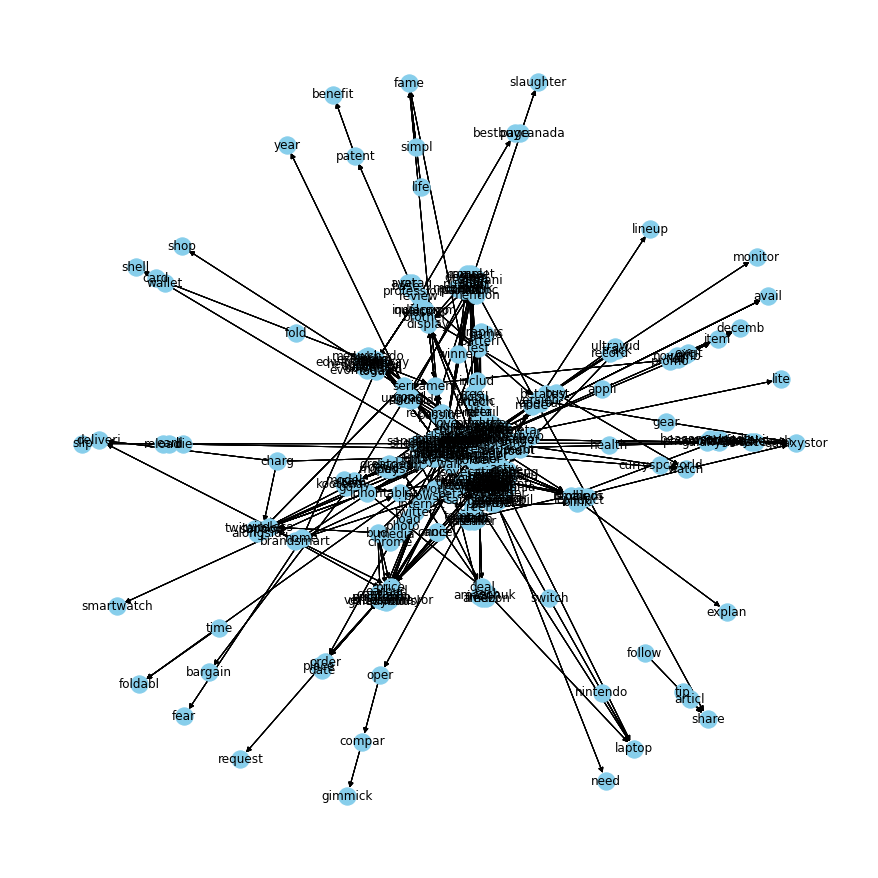

In [37]:
plt.figure(figsize=(12,12))
pos=nx.spring_layout(G_nouns)
nx.draw(G_nouns,with_labels=True,node_color='skyblue',edge_cmap=plt.cm.Blues,pos=pos)
plt.show()

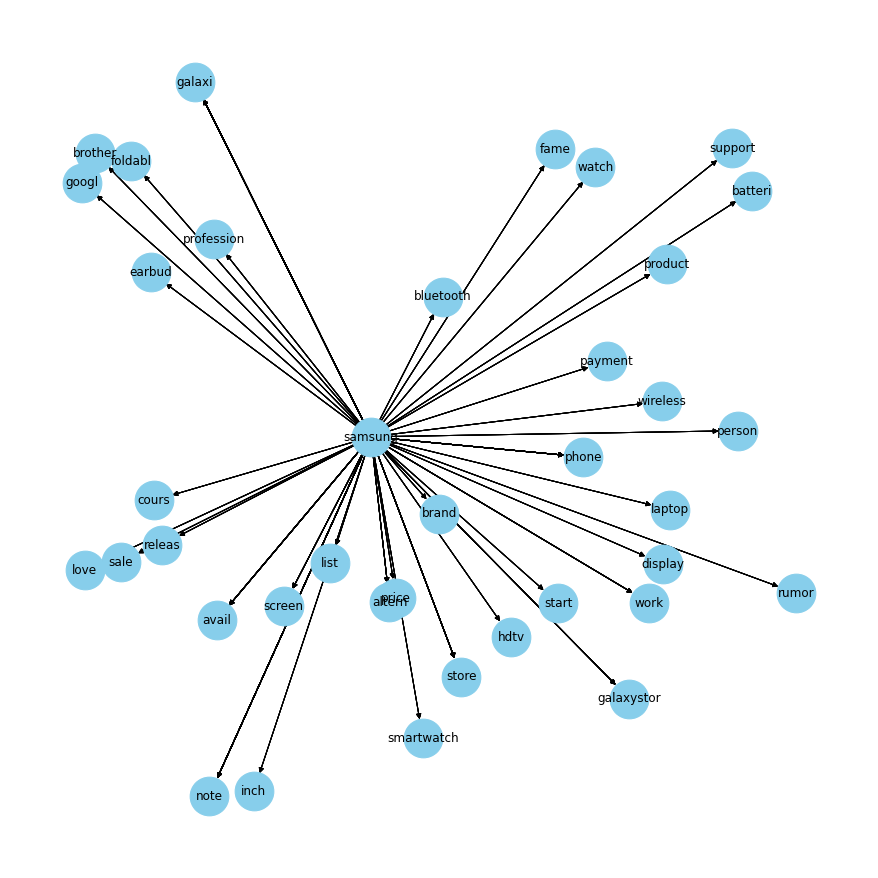

In [38]:
#galaxys6=kg_df[kg_df['source']=="galaxys6"]
G_nouns=nx.from_pandas_edgelist(kg_df[kg_df['source']=="samsung"],"source","target",
                               edge_attr=None,create_using=nx.MultiDiGraph()) 

plt.figure(figsize=(12,12))
pos=nx.spring_layout(G_nouns,k=0.0001) #k regulates the distance between nodes
nx.draw(G_nouns,with_labels=True,node_color='skyblue',node_size=1500,edge_cmap=plt.cm.Blues,pos=pos)
plt.show()


In [39]:
source=list(kg_df['source'].values)
target=list(kg_df['target'].values)

noun_pairs_total=source+target
top_noun_phrases=Counter(noun_pairs_total).most_common()
selected_noun_phrases=[]
for term,count in top_noun_phrases:
    if count>3:
        selected_noun_phrases.append(term)

In [40]:
selected_noun_phrases[0:25]

['samsung',
 'phone',
 'galaxi',
 'note',
 'rate',
 'store',
 'screen',
 'price',
 'appl',
 'brand',
 'repair',
 'galaxystor',
 'deal',
 'peopl',
 'earbud',
 'sale',
 'cell',
 'list',
 'support',
 'altern',
 'love',
 'display',
 'android',
 'work',
 'review']

In [41]:
#removing some common entities like Samsung,Galaxy series phones etc by using the results from LDA and NMF
combined_terms=[term for term in selected_noun_phrases if term in list(finalized_counts.index)]

In [42]:
combined_terms
##Inference: Top topics were mostly relevant, However they are few series names of phones that are repeated the most

['phone',
 'galaxi',
 'note',
 'rate',
 'store',
 'screen',
 'appl',
 'brand',
 'repair',
 'deal',
 'peopl',
 'earbud',
 'sale',
 'altern',
 'display',
 'android',
 'work',
 'review',
 'googl',
 'order',
 'wireless',
 'camera',
 'tablet',
 'download',
 'automobil',
 'pali',
 'bud',
 'seri',
 'product',
 'test',
 'record',
 'face',
 'payment',
 'avail',
 'ipad',
 'ultra',
 'differ',
 'inch',
 'watchfac',
 'point',
 'method',
 'holder',
 'activ',
 'black',
 'buy',
 'galaxywatch',
 'come',
 'flip',
 'fold',
 'steal',
 'tech',
 'glass',
 'docomo',
 'clubberbabi',
 'mount',
 'smartphon',
 'headphon',
 'great',
 'go',
 'need',
 'year',
 'lite']

In [43]:
##Out of the top topics use word embedding to create a matrix (topic-topic similarity matrix)
## that counts the common occurances using word embedding

##Intention behind creating. To use the matrix and combine the words to form a base topic(like camera,capture,shoot to have)

In [44]:
import numpy as np #array related
size=len(combined_terms)
transitionMatrix=np.zeros((size,size))
transitionMatrix

row=0
for word in combined_terms:
    for column in range(len(combined_terms)):
        try:
            transitionMatrix[row][column]=model_glove_twitter.similarity(word,combined_terms[column])
        except:
            transitionMatrix[row][column]=0
    
    row+=1

In [45]:
transitionMatrix.shape

(62, 62)

In [47]:
similarity_matrix=pd.DataFrame(transitionMatrix,columns=combined_terms,index=combined_terms)
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(transitionMatrix)
df_clusters=pd.DataFrame()
df_clusters['labels']=kmeans.labels_
df_clusters['topics']=combined_terms

In [48]:
df_clusters[df_clusters['labels']==3]

,labels,topics
0,3,phone
2,3,note
4,3,store
5,3,screen
7,3,brand
12,3,sale
14,3,display
15,3,android
17,3,review
20,3,wireless


In [1]:
!pip install plotly==2.0.11 
!pip install dash==0.17.5 
!pip install dash_renderer 
!pip install dash_html_components 
!pip install pandas_datareader

  Created wheel for plotly: filename=plotly-2.0.11-py3-none-any.whl size=1038719 sha256=67045adaf59858dd7a9d211bccd3e16635fcbd6b423959139733681836c5403b
  Stored in directory: c:\users\srinath yasoda\appdata\local\pip\cache\wheels\15\78\6d\fd78cecad87e2d176edf366ddafbd6b4c36c881b03d47c9844
Successfully built plotly
  Created wheel for dash: filename=dash-0.17.5-py3-none-any.whl size=16880 sha256=fd6fc1ad13d8287f3d092fd90c9489bf33bb9b668341fbf38ccd2be9cdaa0e87
  Stored in directory: c:\users\srinath yasoda\appdata\local\pip\cache\wheels\0b\23\23\f70efd2f624b6cfa3e8133fba363cb3ae2a54a76f5e16a5406
  Created wheel for flask-seasurf: filename=Flask_SeaSurf-0.2.2-py3-none-any.whl size=5568 sha256=7afabe342eeec25b77c557bc7fc2de74b580009ef91119a597803f20aa331fab
  Stored in directory: c:\users\srinath yasoda\appdata\local\pip\cache\wheels\fe\5b\a9\07a4230f985c8423bc1af134e95c6e3ddac4f94fb154ebd853
Successfully built dash flask-seasurf
  Created wheel for dash-renderer: filename=dash_renderer-1

  Created wheel for dash-html-components: filename=dash_html_components-1.1.1-py3-none-any.whl size=427900 sha256=8e5071905a9a3d6e830b0cfd25990cfe61460202fe893b372bcd3ec580893ea5
  Stored in directory: c:\users\srinath yasoda\appdata\local\pip\cache\wheels\ed\fc\1c\f68ef111763cc328876457a871024052e0b48950c63bc1ac04
Successfully built dash-html-components


In [4]:
!pip install dash-core-components==0.5.3

  Created wheel for dash-core-components: filename=dash_core_components-0.5.3-py3-none-any.whl size=973136 sha256=3216aaca91f2c6917c2e7310c18df7b2ecf6ddb525dba1d6a46a7fea5eb6895b
  Stored in directory: c:\users\srinath yasoda\appdata\local\pip\cache\wheels\1d\f3\3a\4ce69dd91c7a44492926325cbcfddd3514a35482082c8c9228
Successfully built dash-core-components


In [13]:
!pip3 install dash==0.22.0

In [11]:
#!pip install dash_html_components==0.22.0

In [14]:
!pip3 install dash==0.21.1
!pip3 install dash-core-components==0.23.0
!pip3 install dash-html-components==0.11.0
!pip3 install dash-renderer==0.13.0
!pip3 install plotly==2.7.0

  Created wheel for dash: filename=dash-0.21.1-py3-none-any.whl size=17966 sha256=ebb09259afd1f812270c262ceaf9b71d9353d74612af152be4d7da7b2fd5e660
  Stored in directory: c:\users\srinath yasoda\appdata\local\pip\cache\wheels\5d\b4\b5\54f87ce481b9f4a2747c209088c4c281042015061730c79b73
Successfully built dash
  Attempting uninstall: dash
    Found existing installation: dash 0.22.0
    Uninstalling dash-0.22.0:
      Successfully uninstalled dash-0.22.0
  Created wheel for dash-core-components: filename=dash_core_components-0.23.0-py3-none-any.whl size=2037192 sha256=89ebe5dd972a94c8b3b496d41bf14f725d78919e240727c782a5340256b579df
  Stored in directory: c:\users\srinath yasoda\appdata\local\pip\cache\wheels\91\8a\06\1357e26448931b0e59d65e81d1d144385b92fffa6338eab009
Successfully built dash-core-components
  Attempting uninstall: dash-core-components
    Found existing installation: dash-core-components 0.5.3
    Uninstalling dash-core-components-0.5.3:
      Successfully uninstalled dash

  Created wheel for dash-html-components: filename=dash_html_components-0.11.0-py3-none-any.whl size=23083 sha256=6a75e56f467bfbba4c9b683986588b861ab1ad30a0b73aac895a1731459454de
  Stored in directory: c:\users\srinath yasoda\appdata\local\pip\cache\wheels\7c\ef\45\b0ab4a2e4410f3537b0e793fcbd2441dbcdf246b741418e170
Successfully built dash-html-components
  Attempting uninstall: dash-html-components
    Found existing installation: dash-html-components 1.1.1
    Uninstalling dash-html-components-1.1.1:
      Successfully uninstalled dash-html-components-1.1.1
  Created wheel for dash-renderer: filename=dash_renderer-0.13.0-py3-none-any.whl size=164349 sha256=e22da64bfac28f5c11804d2febb04a7f1153b115d8ef43c1d5b28b4b67298c32
  Stored in directory: c:\users\srinath yasoda\appdata\local\pip\cache\wheels\0a\f6\5a\6f55c52020a54bea37d0391b18764484f6c9995a97d36a2c8f
Successfully built dash-renderer
  Attempting uninstall: dash-renderer
    Found existing installation: dash-renderer 1.8.3
    Uni

In [ ]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
from pandas_datareader import data as web
from datetime import datetime as dt
import pandas as pd

app=dash.Dash('Hello World')

app.layout=html.Div([
        dcc.Dropdown(
            id='my-dropdown',
        options=[
            {'label':'Coke','value':'COKE'},
            {'label':'Tesla','value':'TSLA'},
            {'label':'Apple','value':'AAPL'}
        ],
            value='COKE'          
        ),
        dcc.Graph(id='my-graph')
], style={'width':'500'})

@app.callback(Output('my-graph','figure'),[Input('my-dropdown','value')])

def update_graph(selected_dropdown_value):
    
    df=web.DataReader(
        selected_dropdown_value,'google',dt(2017,1,1),dt.now)
    
    return {
        'data':[{
            'x':df.index,
            'y':df.Close
        }],
        'layout':{'margin':{'1':40,'r':0,'t':20,'b':30}}
    }


app.css.append_css({'external_url':'https://codepen.io/chriddyp/pen/bWLwgP.css'})

if __name__=='__main__':
    app.run_server()


 * Serving Flask app "Hello World" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Nov/2020 10:02:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:03:03] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:03:03] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 10:03:03] "GET /_dash-dependencies HTTP/1.1" 200 -
[2020-11-30 10:03:03,626] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Srinath Yasoda\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Srinath Yasoda\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Srinath Yasoda\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\Srinath Yasoda\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
 

127.0.0.1 - - [30/Nov/2020 10:19:32] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [30/Nov/2020 10:19:32] "GET /favicon.ico HTTP/1.1" 200 -
[2020-11-30 10:19:46,522] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\Srinath Yasoda\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Srinath Yasoda\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Srinath Yasoda\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\Srinath Yasoda\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\Srinath Yasoda\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Srinath Yas

In [17]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'}, 
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

 * Serving Flask app "dash" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1